## 15-3. 포켓몬, 그 데이터는 어디서 구할까?


자, 포켓몬의 특성을 이용해서 전설의 포켓몬을 구별해 내기 프로젝트, 바로 시작해 보겠습니다.

가장 먼저 필요한 것은 무엇인가요?! 🤔

네, 당연히 포켓몬 데이터셋이겠죠! 데이터셋을 구해 보겠습니다.

우리는 캐글(Kaggle)이라는 데이터 분석 경진대회 사이트에 올라와 있는 데이터셋을 활용할 예정입니다. 다음 링크로 들어가서 포켓몬 데이터셋을 한번 구경해 보죠.

[캐글] Pokemon with stats(https://www.kaggle.com/abcsds/pokemon)
다음과 같은 화면이 뜨셨다면 성공입니다!

위 화면은 캐글에 업로드되어 있는 "Pokemon with stats" 라는 데이터셋 페이지입니다.
캐글은 데이터 분석 경진대회뿐만 아니라 다양한 데이터셋도 구할 수 있는 좋은 장소기 때문에 익숙해지는 것이 좋습니다.

아직 계정이 없으시다면 이참에 회원가입을 해보시는 것도 좋습니다.

위 화면에서 보면 Description이라는 곳에 다양한 설명이 쓰여 있습니다. 한 번 읽어보고, 다음 퀴즈에 대한 답을 적어봅시다.

이제 데이터 셋 준비는 끝났습니다. 이제부터 단계별로 데이터셋을 하나하나 뜯어보겠습니다.

## 15-4. 포켓몬 데이터 불러오기


### 라이브러리 가져오기


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


### 데이터셋을 pandas로 불러오기


In [2]:
import os
csv_path = os.getenv("HOME") + "/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print("Done")

Done


위 코드가 문제없이 실행되었다면 우리의 포켓몬 데이터는 original_data에 무사히 저장된 것입니다!

다만, original_data 변수를 그대로 사용하지 않고 원본 데이터를 담은 변수는 고이 놔둘 것입니다. 다음과 같이 원본 데이터를 복사해서 pokemon이라는 변수를 새로 만들어 사용할 거예요.

이렇게 하는 이유는, 앞으로 데이터를 다루면서 데이터셋에 다양한 작업을 할 것이기 때문에 원본 데이터는 훼손하지 않고 놔두기 위함입니다. 꼭 필요한 과정은 아니지만, 이렇게 원본 데이터를 메모리 상에 따로 두는 습관은 다양한 데이터 작업을 할 때 때때로 도움이 됩니다.

다음 코드로 pokemon 변수에 데이터를 저장하고, pandas로 데이터를 나타내 볼까요!

In [4]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


위에서 print(pokemon.shape)로 데이터셋의 크기를 출력하였습니다.
데이터셋은 총 800행, 13열로 이루어져 있군요.
포켓몬이 총 800마리이고, 각 포켓몬을 설명하는 특성(feature)은 13개라고 해석할 수 있겠습니다.

이 중 우리가 타겟으로 두고 확인할 데이터는 Legendary (전설의 포켓몬인지 아닌지의 여부)이므로, Legendary == True 값을 가지는 레전드 포켓몬 데이터셋은 legendary 변수에, Legendary == False 값을 가지는 일반 포켓몬 데이터셋은 ordinary 변수에 저장해두겠습니다.

In [11]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [12]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [15]:
test = pokemon[pokemon["Legendary"] == False].reset_index()
test

,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
731,788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
732,789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
733,790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


## 15-5. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체 칼럼

### 빈 데이터 확인하기


In [17]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

흠, 왜 이런 빈 데이터가 존재하는 걸까요?

Type 2 컬럼에만 총 386개의 결측치가 있군요. Type 1이 있고 Type2도 있으므로, 뭔가 두 번째 속성이 없는 포켓몬이 있는 것 같습니다.

데이터셋을 다룰 때 빈 데이터를 다루는 것은 매우 조심스러운 일입니다. 데이터셋의 성격에 따라 빈 데이터를 어떻게 다루어야 할지에 대한 방법이 달라지기 때문이죠.

우리의 데이터에 존재하는 빈 데이터는 무엇일지, 더 자세한 내용은 조금 후에 살펴보도록 하겠습니다.

### 전체 컬럼 이해하기


그럼 이제 본격적으로 각 컬럼에 대해 보다 자세하게 뜯어보겠습니다.
데이터가 800개이고, 컬럼이 13개로 큰 데이터셋이 아니므로, 최대한 모든 데이터들을 하나하나 이해해 볼 수 있겠습니다.

데이터셋의 전체 컬럼을 출력하면 다음과 같습니다.

In [18]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

위에서도 살펴봤지만, 다시 한번 자세하게 짚고 넘어가죠. 각 컬럼이 나타내는 바와 데이터 타입은 다음과 같습니다.

- '#' : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int
- Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
- Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
- Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
- Total : 전체 6가지 스탯의 총합. int
- HP : 포켓몬의 체력. int
- Attack : 물리 공격력. (scratch, punch 등) int
- Defense : 물리 공격에 대한 방어력. int
- Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
- Sp. Def : 특수 공격에 대한 방어력. int
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
- Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
- Legendary : 전설의 포켓몬 여부. !! Target feature !! bool

## 15-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름


### # : ID number


가장 첫 번째 컬럼입니다. 바로 #이라고 쓰여있는, ID 컬럼이죠.
총 몇 종류의 # 값이 있는지 확인해 보겠습니다.

In [49]:
# DJ's version
len(set(pokemon['#'].values))

721

In [50]:
len(set(pokemon["#"]))

721

전체 데이터는 총 800개인데 #컬럼을 집합으로 만든 자료형은 그보다 작은 721개의 데이터를 가집니다. 파이썬의 집합(set) 자료형은 중복 데이터를 가질 수 없죠? 따라서 집합의 크기가 800이 아니라 721이므로 # 컬럼의 값은 unique하지 않으며(index로 쓸 수 없으며), 같은 번호를 가지는 컬럼들이 있음을 알 수 있습니다.

같은 # 값을 가지는 포켓몬을 확인해 볼까요?

In [53]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


예를 들어 #6의 포켓몬은 Charizard, CharizardMega Charizard X, CharizardMega Charizard Y 세 개로 나뉩니다.
기본 포켓몬인 Charizard로부터 시작해서 진화한 Mega Charizard가 있고, X, Y는 성별을 나타내는 것으로 보입니다.

### Name : 이름

이름은 문자열로 나타나는 데이터입니다.
모든 포켓몬은 이름을 갖고 있죠. 특별하게 확인할 것은 아직 없는 것 같고, 혹시 모든 이름이 유일한 이름인지만 확인해 볼까요?

다음과 같이 pokemon["Name"]을 집합(set)으로 만들어 준 후 길이(len)를 확인하면 중복이 사라지면서 유일한 이름의 개수를 확인할 수 있습니다

In [54]:
# DJ's version
pokemon[pokemon['Name'].duplicated() == True]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [55]:
len(set(pokemon["Name"]))

800

이름은 데이터셋 전체 값과 같이 800개군요. 모든 이름은 unique함을 알 수 있습니다.

## 15-7. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (3) 포켓몬의 속성

### Type 1 & Type 2 : 포켓몬의 속성

이제 포켓몬의 속성 차례입니다.
맨 처음에 피카츄(전기), 파이리(불) 등의 간판 포켓몬들을 보면서 각 포켓몬에게 속성이 존재한다는 것을 알았죠.

저희의 데이터셋에도 각 포켓몬의 속성이 나타납니다. 무작위로 두 마리의 포켓몬을 한번 살펴보겠습니다.

In [78]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성 두 가지를, 8번 포켓몬인 Wartortle은 Water 속성 단 한 가지만 가지는군요.

전체를 살펴봐야 하지만, 몇 개를 더 찍어봐도 포켓몬이 가지는 속성은 기본적으로 하나, 또는 최대 두 개까지 가질 수 있는 것을 알 수 있습니다.
특히, 데이터 셋에서 한 개의 속성을 가지는 포켓몬은 Type 1에만 속성이 표시되고 Type 2에는 NaN값이 들어가 있습니다.

그렇다면, 각 속성의 종류는 총 몇 가지인지 알아봅시다

In [83]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지의 속성이 들어가 있는데, 여기서 Type 2가 한 가지 더 많은 것은 뭘까요?

각자를 집합으로 만들어 차집합을 확인해 봅시다.

In [85]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

둘의 차집합은 바로 NaN 값이군요.
따라서 NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있음을 알 수 있습니다.

포켓몬들의 모든 Type을 types 변수에 저장하겠습니다.

In [86]:
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Poison', 'Normal', 'Psychic', 'Rock', 'Steel', 'Fighting', 'Fire', 'Ground', 'Grass', 'Water', 'Fairy', 'Bug', 'Ice', 'Dark', 'Dragon', 'Electric', 'Ghost', 'Flying']


그렇다면 Type을 하나만 가지고 있는 포켓몬은 몇 마리일까요?
Type이 단 하나뿐이라면 Type 2는 NaN 값일 것일 겁니다. Type 2가 Nan인 포켓몬의 수를 구해봅시다.

데이터가 비어있는 NaN값의 개수를 확인하고 싶을 때는 다음과 같이 isna() 함수를 활용하면 됩니다.

In [87]:
pokemon["Type 2"].isna().sum()

386

총 386개의 포켓몬은 속성을 하나만 가지고, 나머지는 두 개의 속성을 가지는군요!

### Type 1 데이터 분포 plot

일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 확인하겠습니다.
우리의 데이터는 일반 포켓몬보다 전설의 포켓몬 수가 매우 적은 불균형 데이터이기 때문에, 전설의 포켓몬은 따로 시각화해 주는 것이 좋을 것 같군요.

다음과 같이 plt의 subplot을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 sns(seaborn)의 countplot을 활용하겠습니다.
countplot은 말 그대로 데이터의 개수를 표시하는 플롯입니다

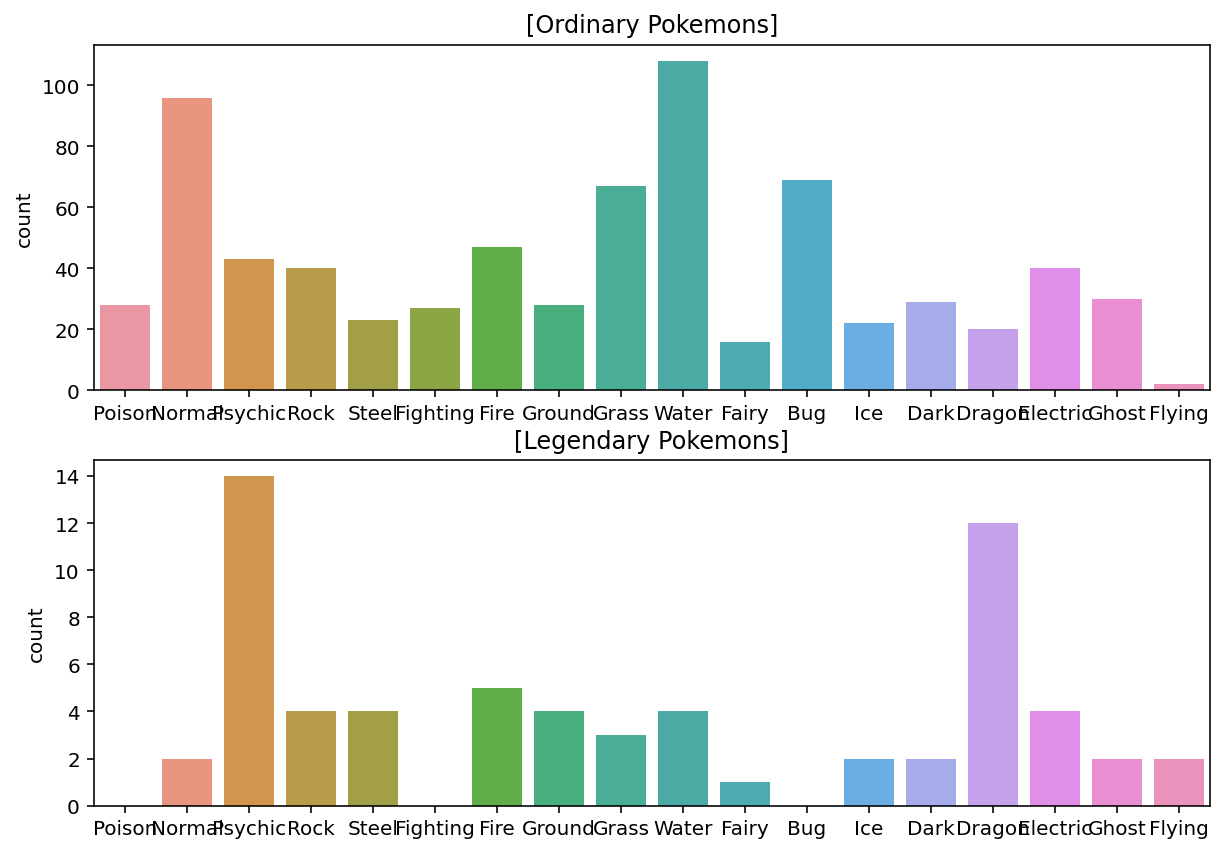

In [90]:
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

어떤가요? 그래프를 잠시 들여다보면서 상황을 살펴보죠.

네, 확실히 일반 포켓몬과 전설의 포켓몬 속성 분포에는 차이가 보이는 것 같습니다.
일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많네요.

그렇다면, 피벗 테이블(pivot table)로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인해 봅시다.
sort_value를 활용해 높은 것부터 낮은 순으로 정렬해 보았습니다.

In [91]:
# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


### Type 2 데이터 분포 plot


그렇다면 Type 2는 어떨까요?
참고로, Type 2에는 NaN(결측값)이 존재했었습니다. Countplot을 그릴 때는 결측값은 자동으로 제외됩니다.

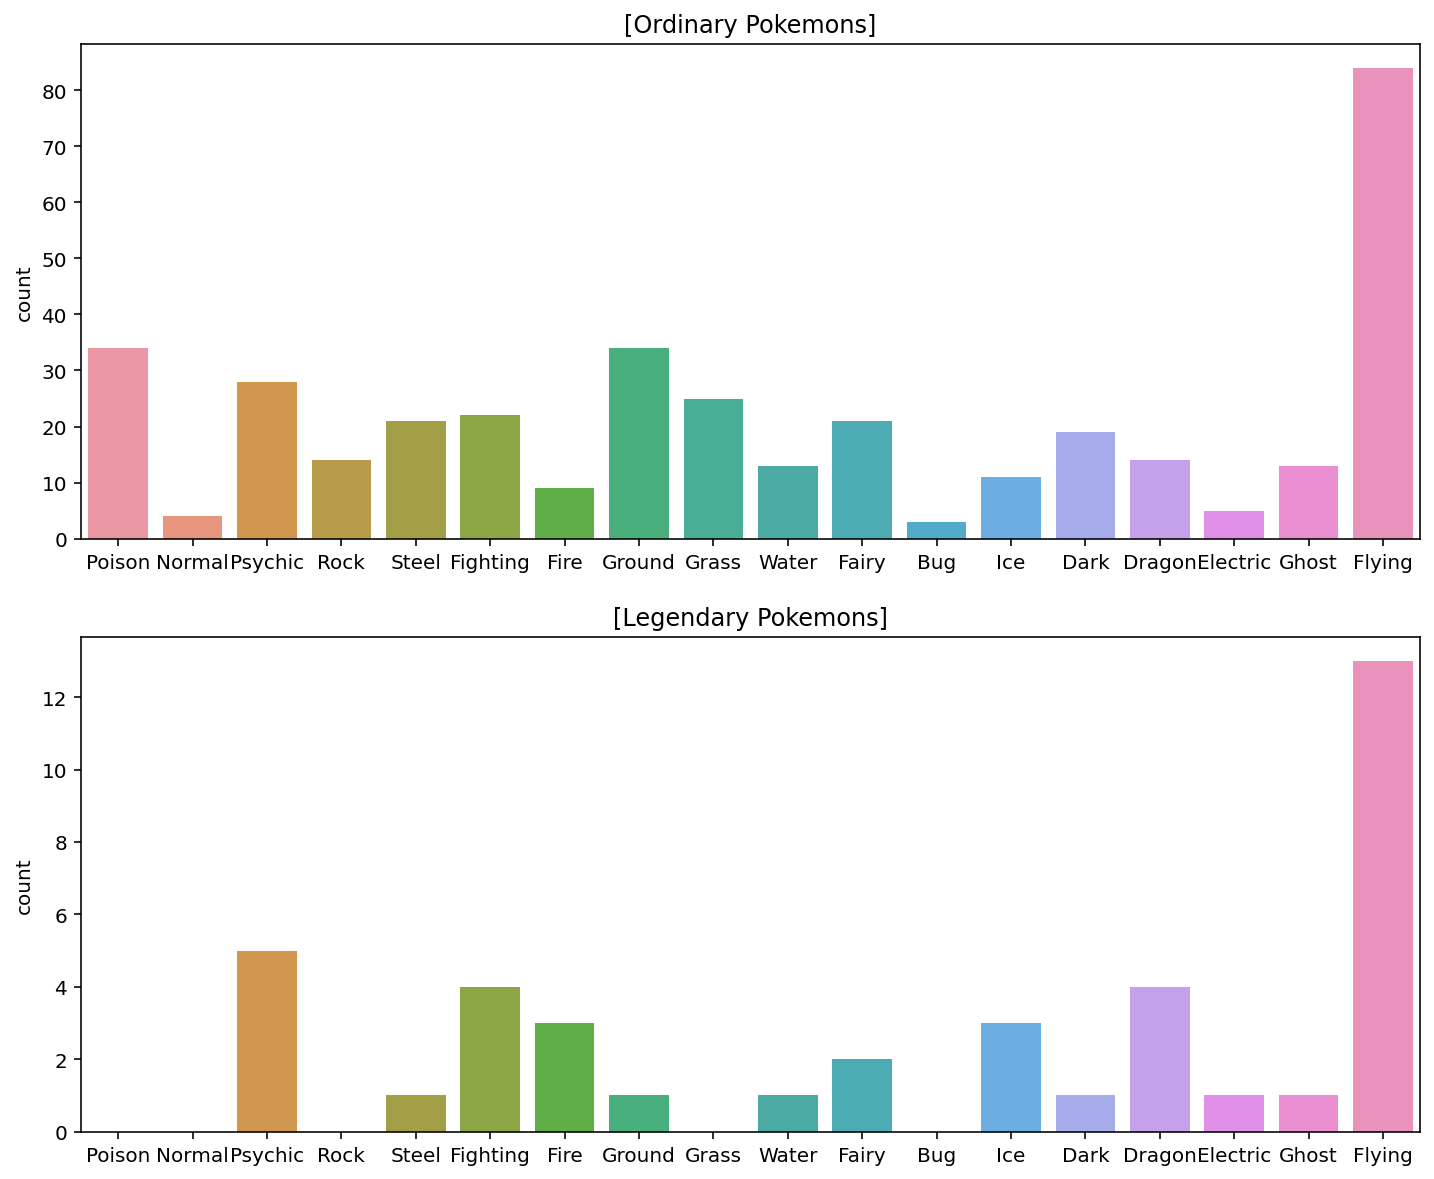

In [97]:
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

Type 2 또한 일반 포켓몬과 전설의 포켓몬 분포 차이가 보입니다.
Flying 속성의 경우 두 경우 다 가장 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없습니다.

대신 여전히 Dragon, Psychic과 더불어 Fighting과 같은 속성이 많습니다.

역시 피벗 테이블로도 확인해 볼까요?

In [98]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


Type2에서는 Fire 속성 포켓몬의 Legendary 비율이 25%로 가장 높습니다.

## 15-8. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (4) 모든 스탯의 총합

### Total : 모든 스탯의 총합


In [99]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [100]:
# total이 맞는지 검증

print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [101]:
pokemon['Total'].values.sum()

348082

In [104]:
pokemon[stats].values.sum()

348082

In [105]:
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

### Total값에 따른 분포 plot


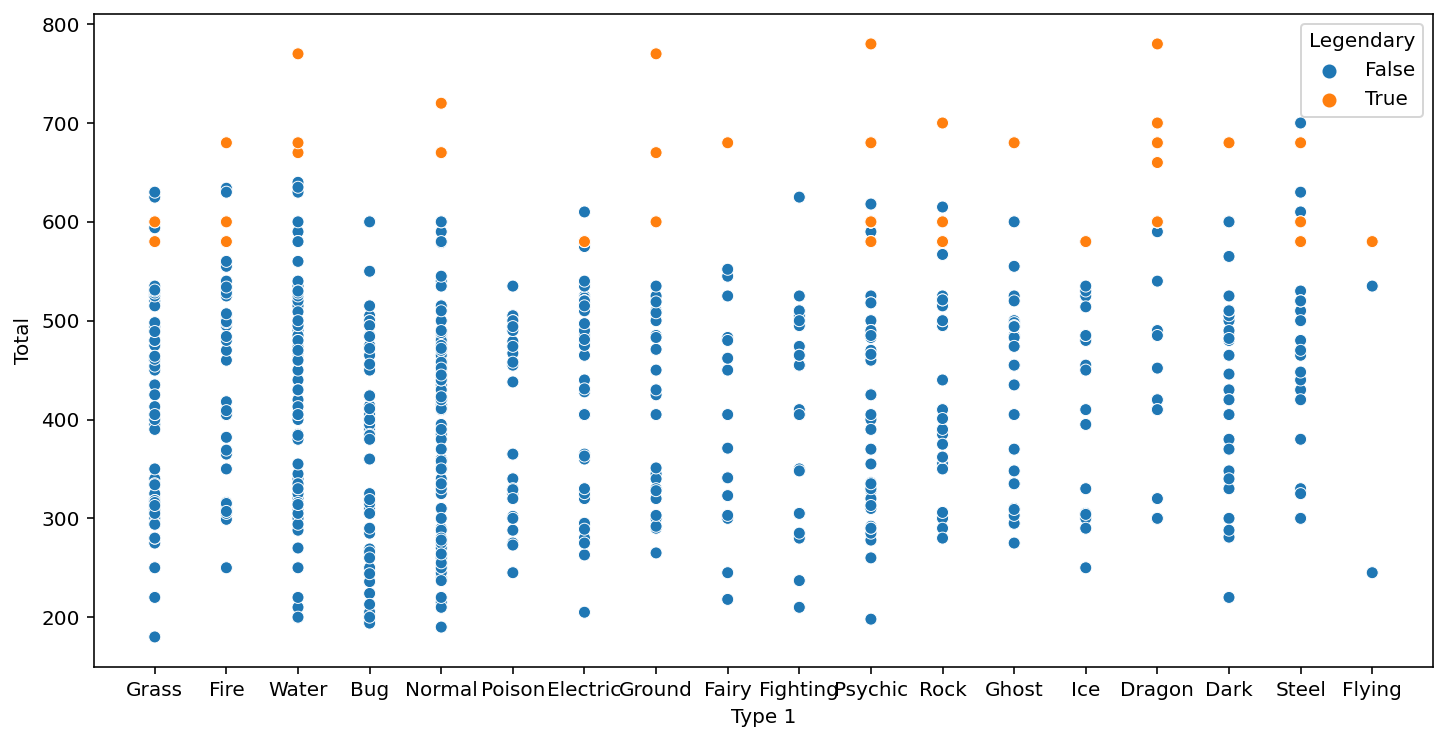

In [108]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

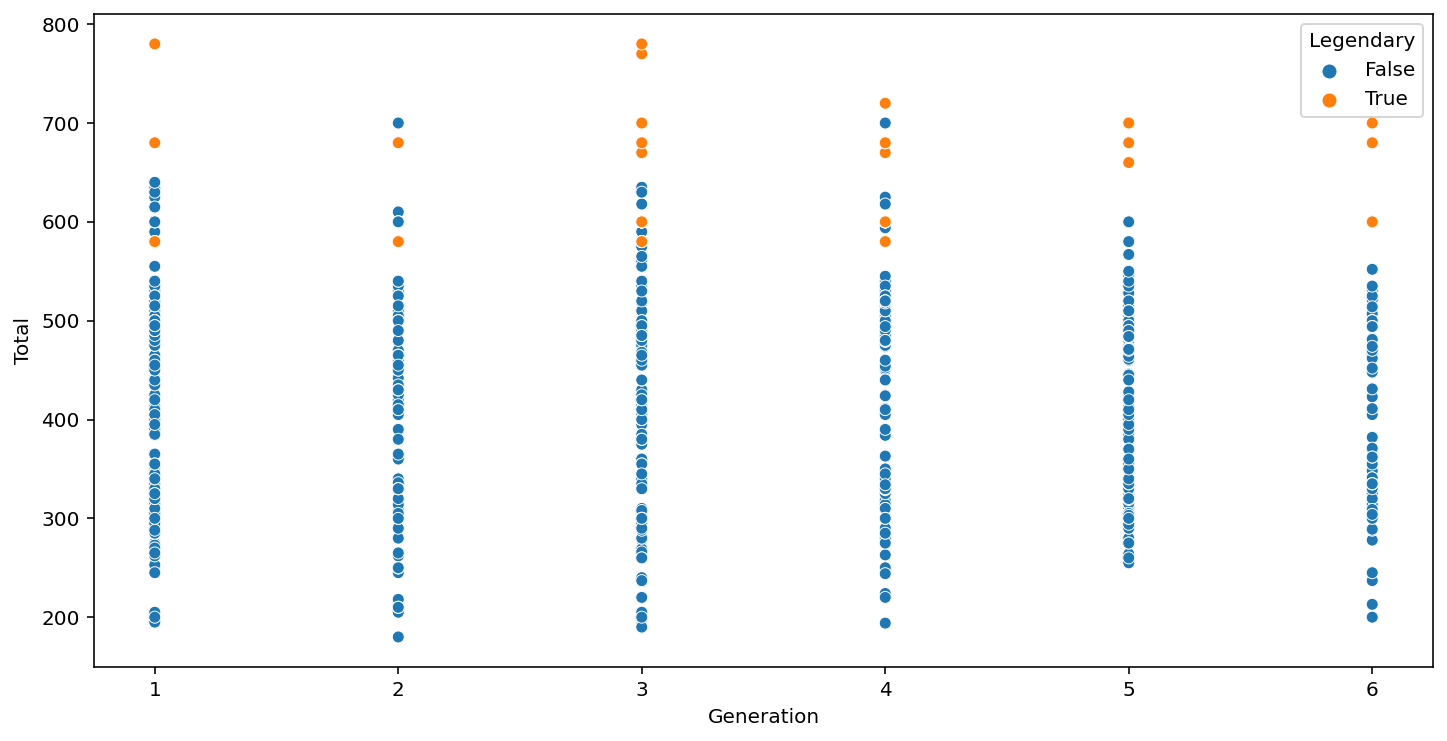

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x='Generation', y='Total', hue='Legendary')
plt.show()

## 15-9. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (5) 세부 스탯


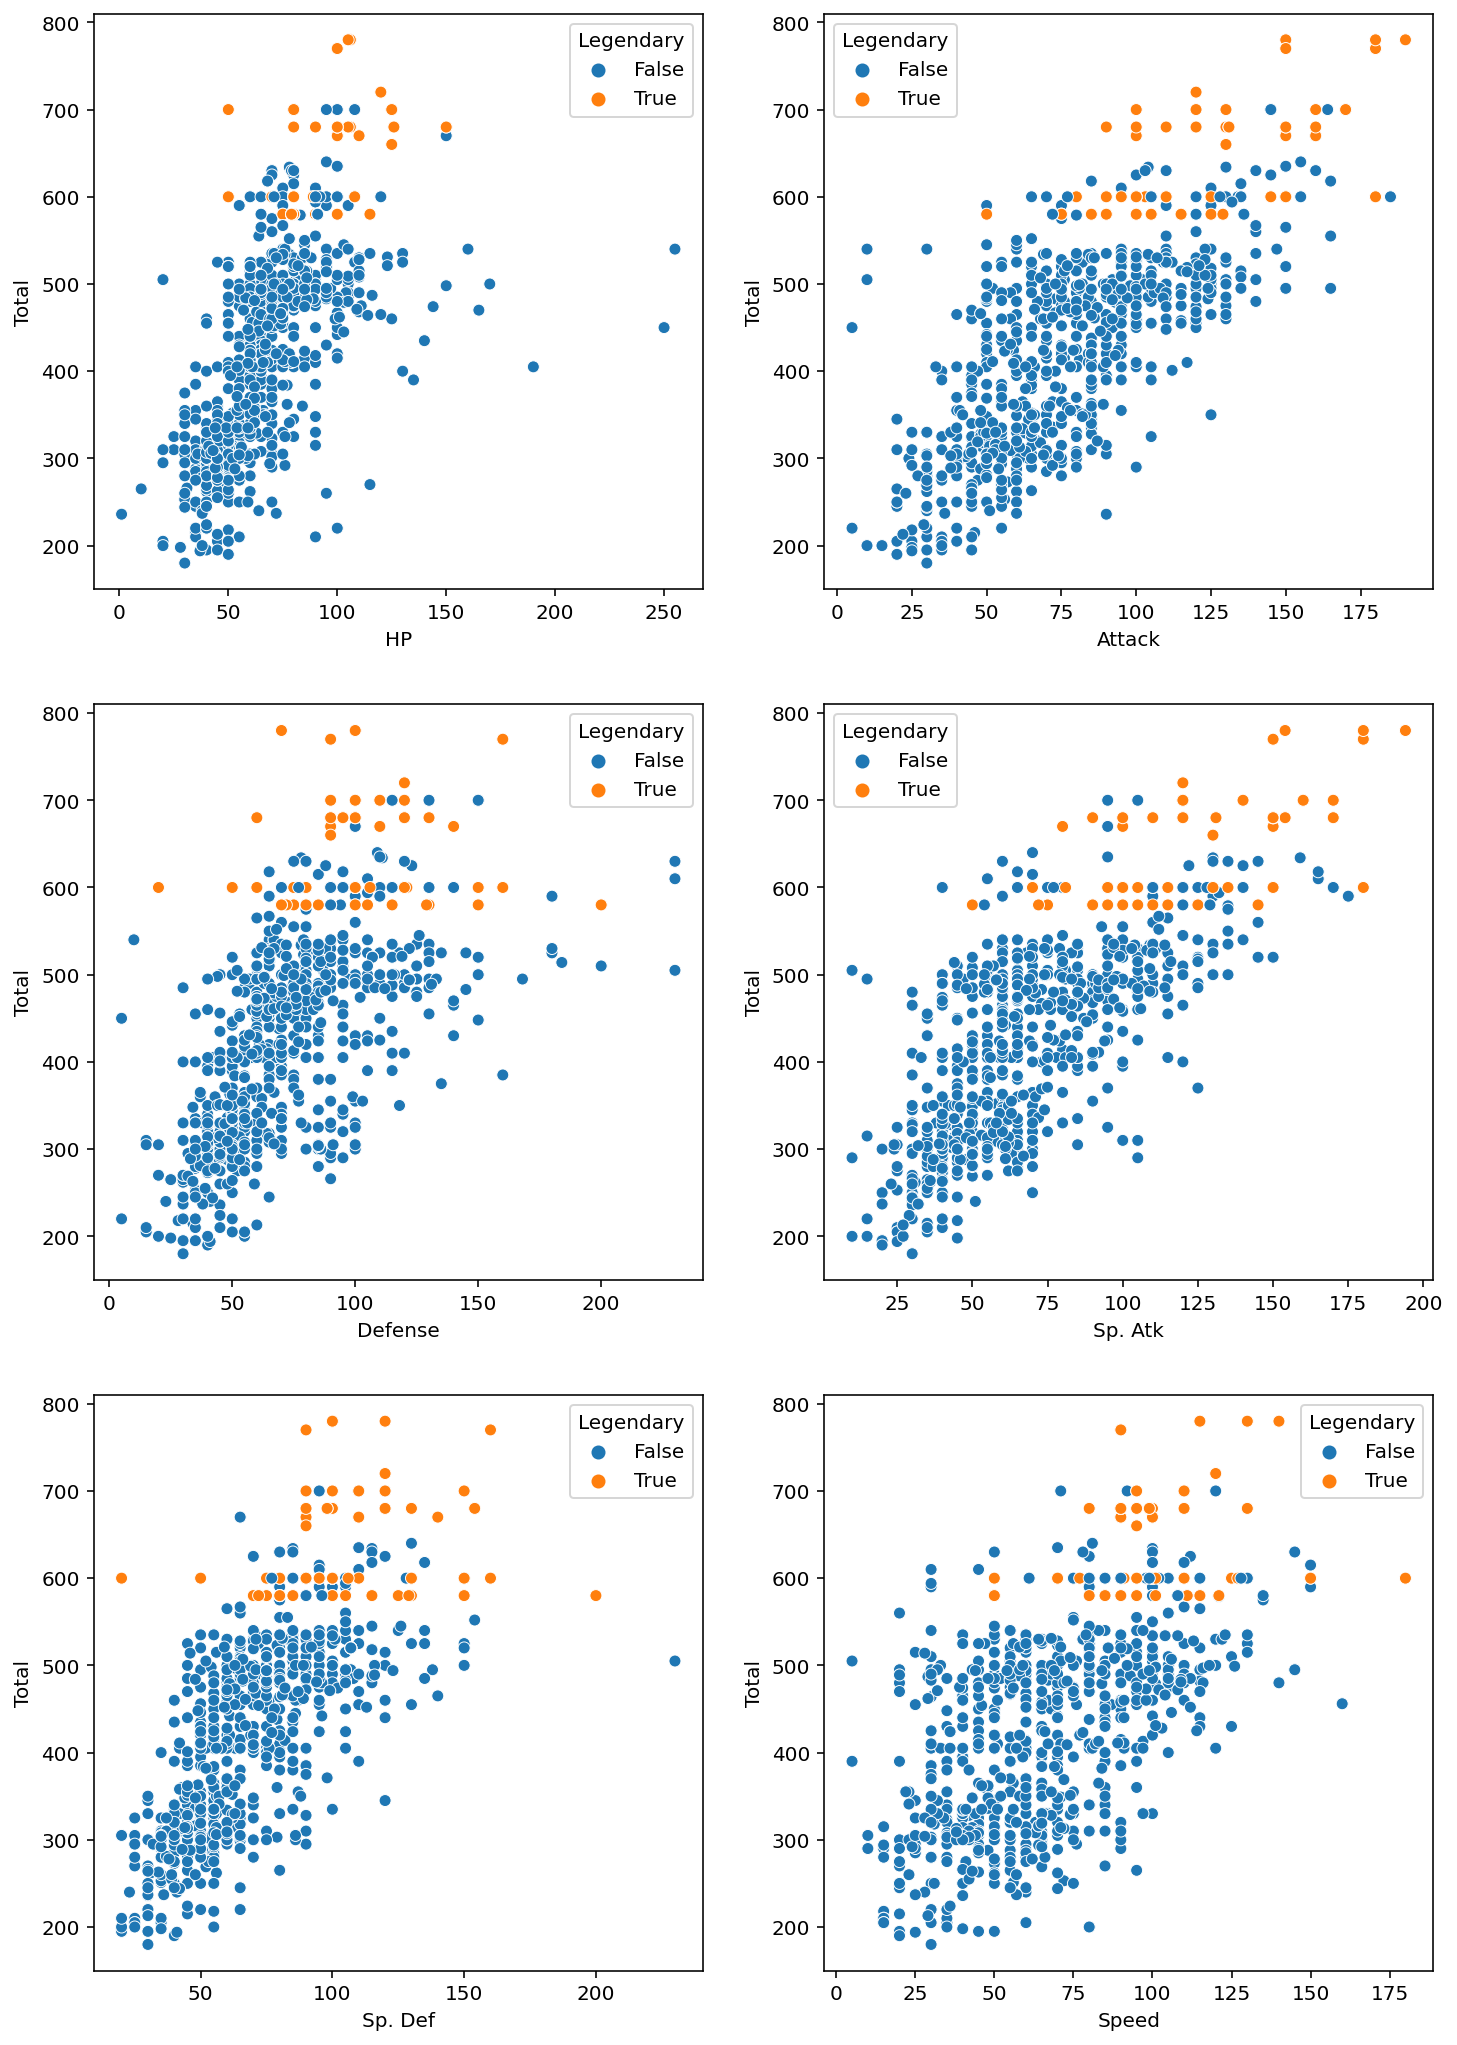

In [110]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

## 15-10. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (6) 세대



### Generation

Text(0.5, 1.0, 'Legendary')

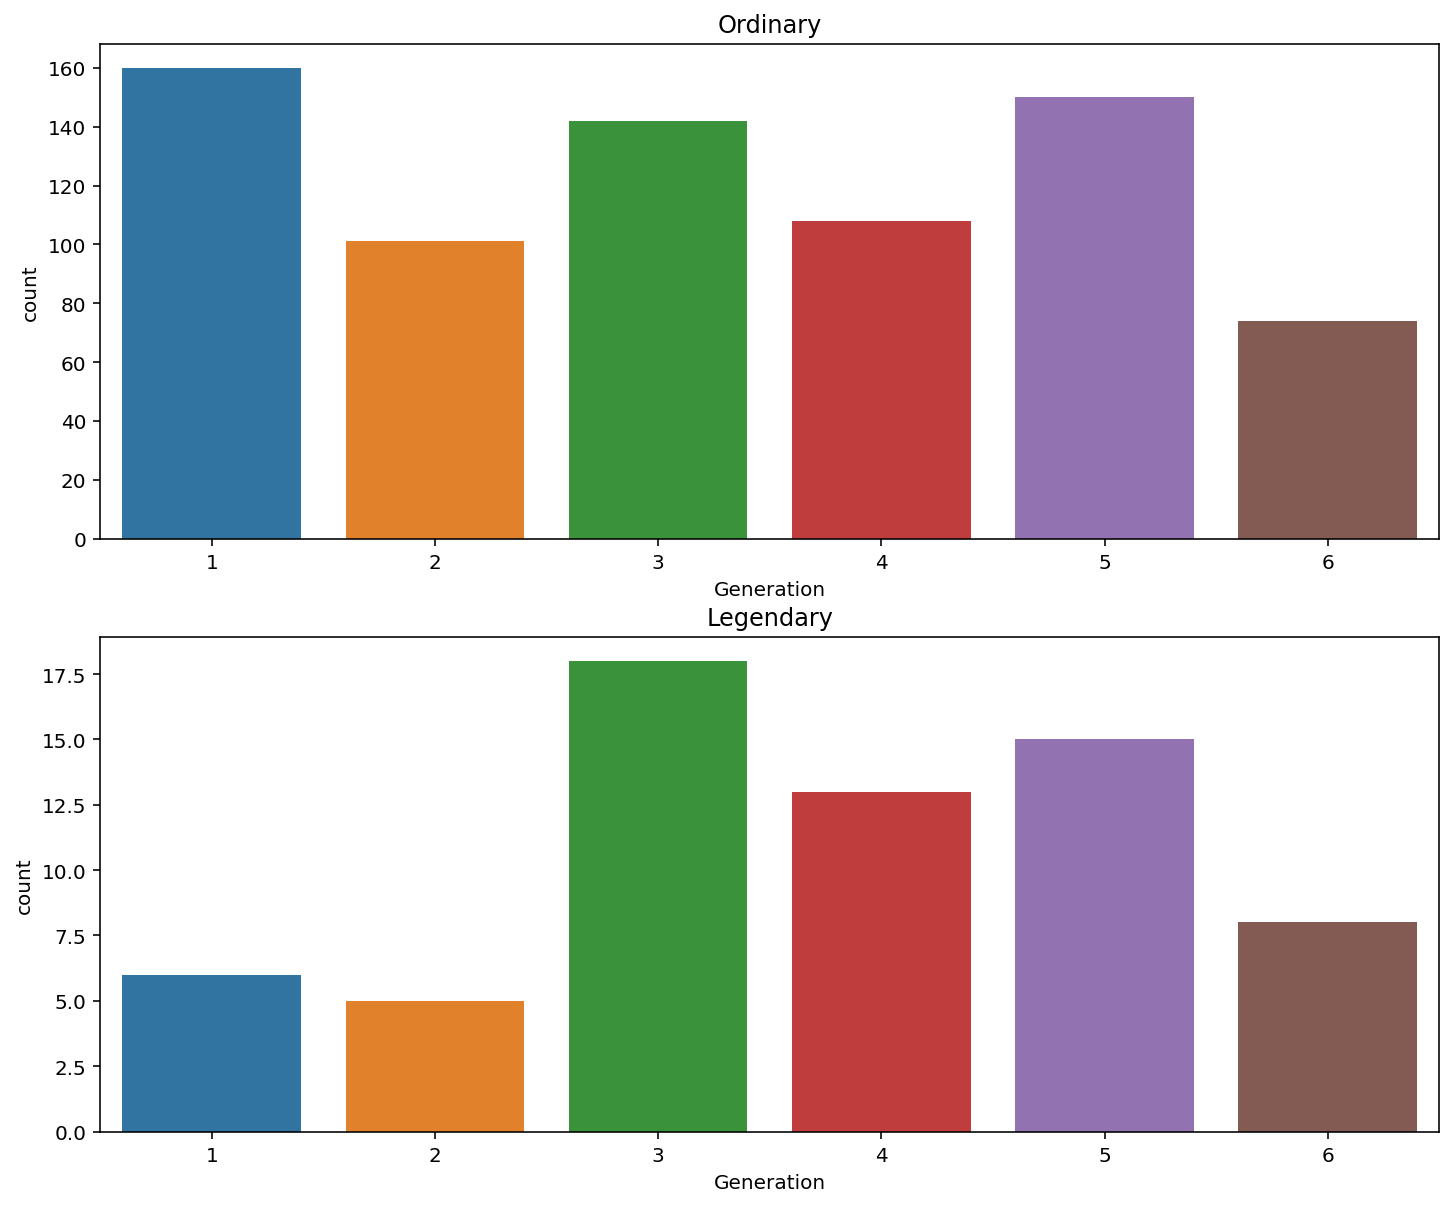

In [112]:
# DJ's version
plt.figure(figsize=(12,10))

plt.subplot(2, 1, 1)
sns.countplot(data=ordinary, x='Generation')
plt.title('Ordinary')

plt.subplot(2, 1, 2)
sns.countplot(data=legendary, x='Generation')
plt.title('Legendary')


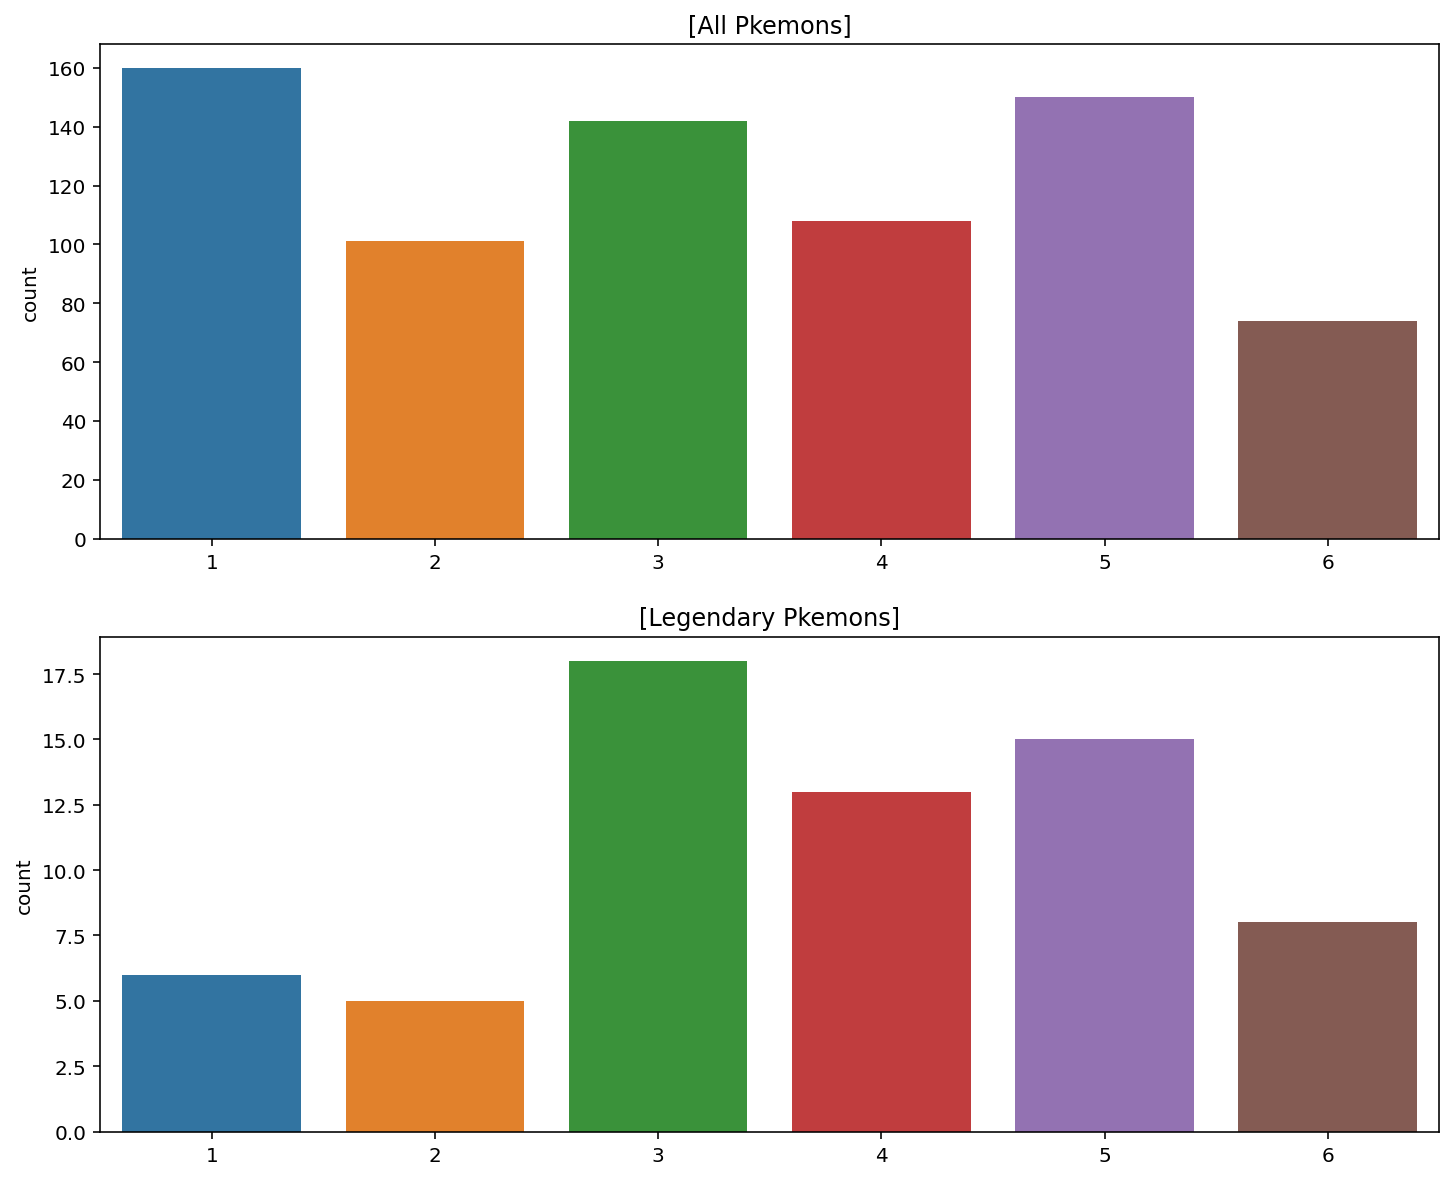

In [113]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")
plt.show()

## Total

<Figure size 1080x864 with 0 Axes>

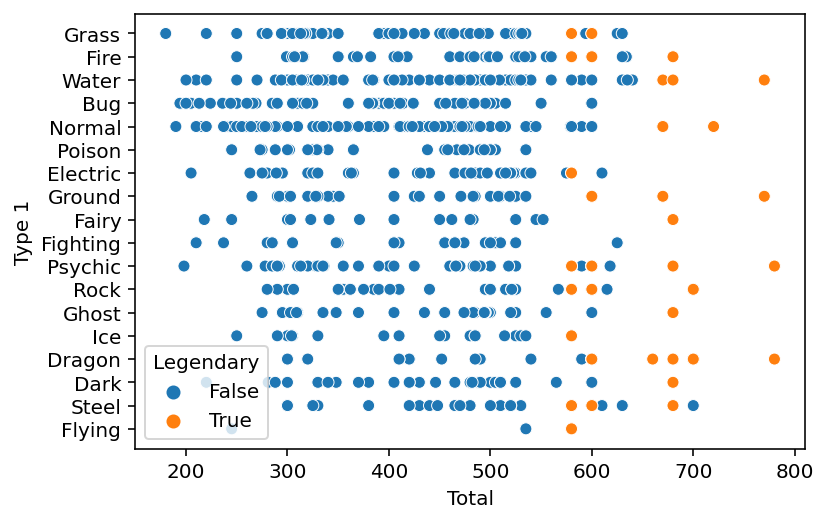

In [115]:
# legendary 포켓몬 total 값 분포 확인

plt.figure(figsize=(15, 12))
fig, ax = plt.subplots()

sns.scatterplot(data=pokemon, x='Total', y='Type 1', hue='Legendary')
plt.show()

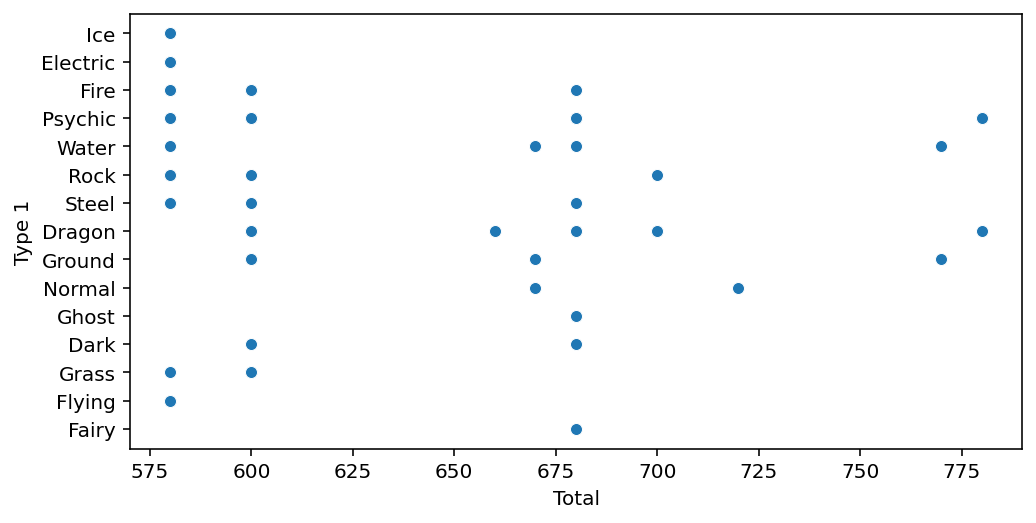

In [116]:
# legendary만 보기

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

#### 600, 675 등 특정 숫자에만 분포된 것 확인

In [117]:
# legendary total의 종류 확인해보기
# 수가 적을 것으로 예상
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


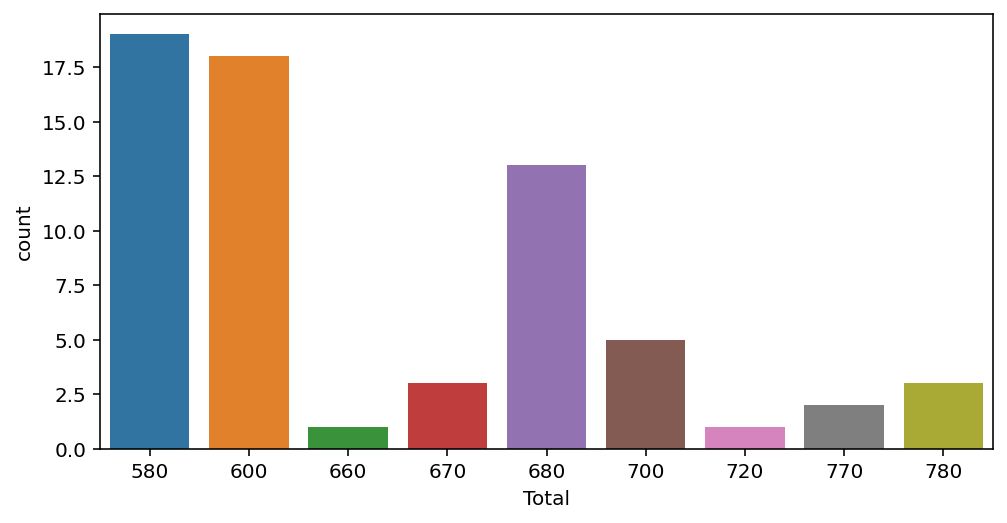

In [118]:
# 그렇다면 각각의 total에 대한 legendary 포켓몬의 수는?

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [119]:
# 각각 total에 대한 몇 개의 포켓몬이 속하는지 비율 확인
round(65 /9, 2)

7.22

### ordinary도 같은 지 확인

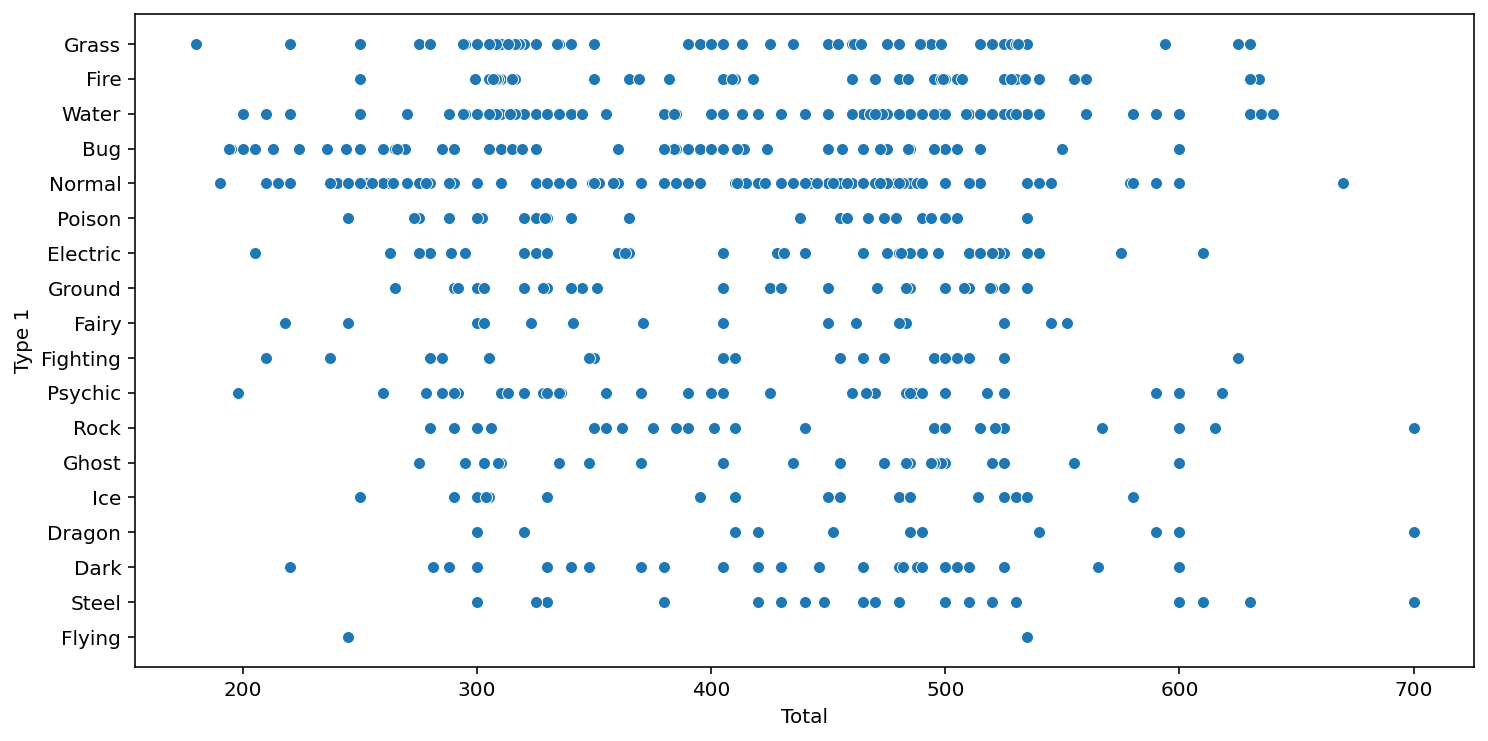

In [123]:
# Type 1 별로 Total 확인(Type 1은 범주형으로 간단히 나타내주기 위해 설정)

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=ordinary, x='Total', y='Type 1')
plt.show()

In [124]:
# Ordinary이 Total 갯수 및 비율 확인

print(len(list(set(ordinary['Total'])))) # 갯수
print(round(len(ordinary['Total']) / len(list(set(ordinary['Total']))), 2)) # 비율

195
3.77


In [125]:
# Aiffel version
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [126]:
# Aiffel version
len(sorted(list(set(ordinary["Total"]))))

195

In [127]:
# Aiffel version
round(735 / 195, 2)

3.77

### 결론 :
- 1) 특정 total에 legendary가 몰려있는 특성상 해당 total에 속하면 legendary일 확률이 높음
- 2) 분포상 특정 total 값 이상으로 ordinary가 가지는 비율이 적음

## 이름

In [128]:
# Aiffel에서 제공한 특정 이름을 갖는 예시들
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [129]:
# forme가 들어가는 이름들(Aiffel 제공)
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [136]:
# 아래는 실제 이름의 길이가 legendary / ordinary 많이 차이나는지 DJ 직접 확인

<AxesSubplot:ylabel='Frequency'>

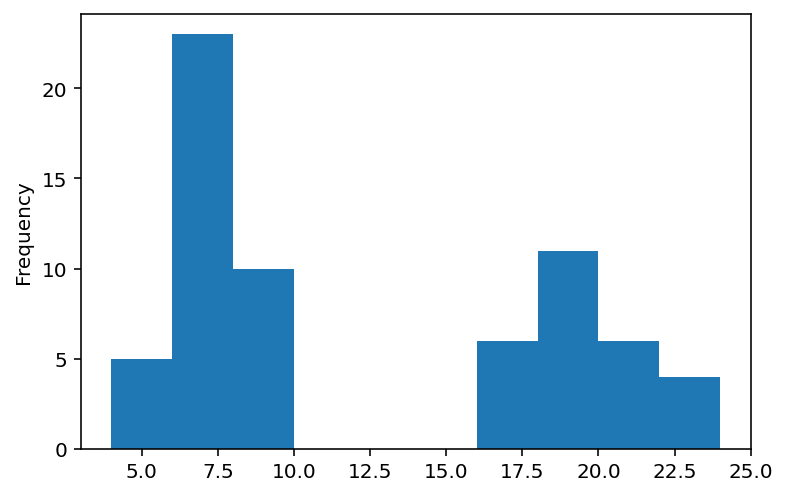

In [135]:
legendary_name_len = legendary['Name'].apply(lambda x: len(x))
legendary_name_len.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

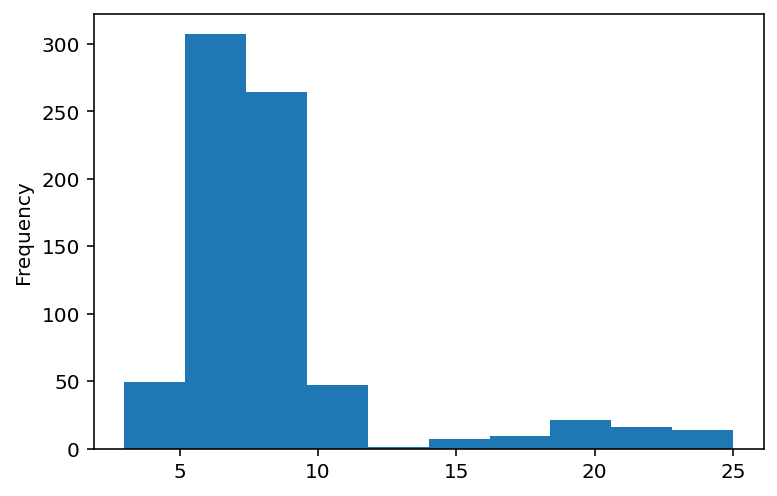

In [134]:
ordinary_name_len.plot(kind='hist')

### 긴 이름

In [137]:
# Aiffel 제공
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [138]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


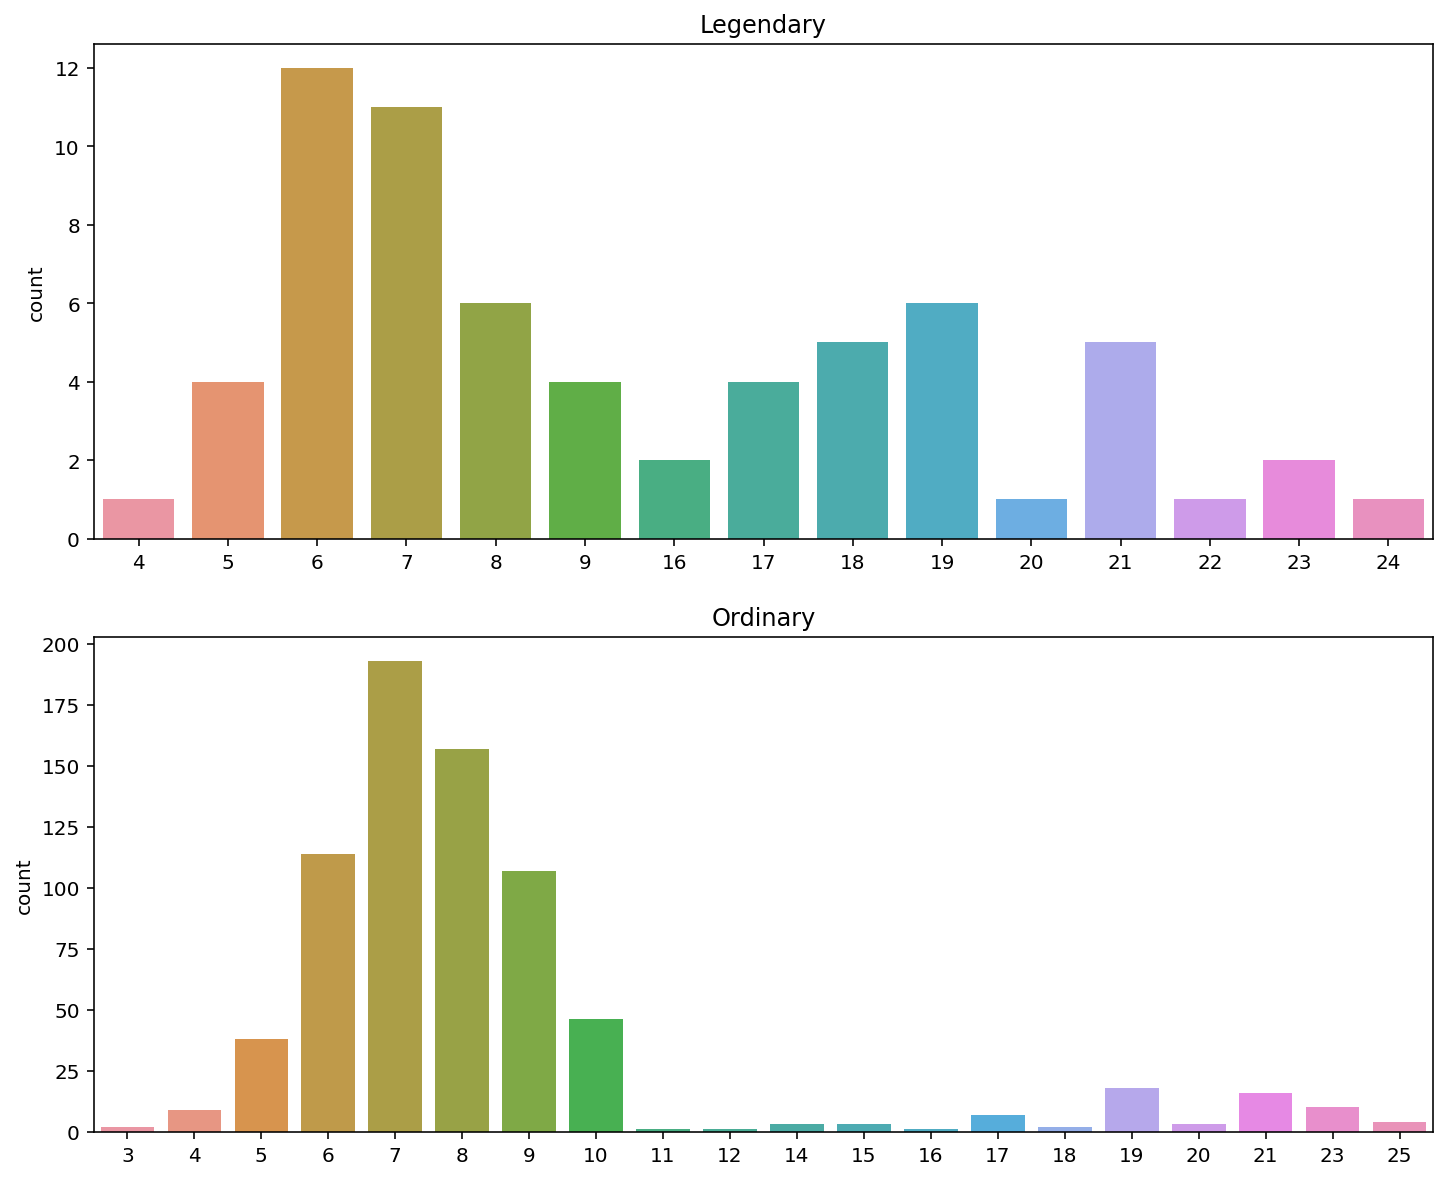

In [139]:
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [145]:
# 전설의 포켓몬 이름이 10글자 이상일 확률
round((legendary['name_count'] > 9).sum() / len(legendary['name_count']), 2) * 100

42.0

In [144]:
# AIFFEL
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [149]:
# AIFFEL
# 일반 포켓몬이 10글자 이상일확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


### 결론:
- 이름이 길면 전설일 확률이 높다
- 특정 이름을 가지면 전설일 확률이 높다
- 어떤 성을 가지면(예 : Latios) Latios &&&&도 전설일 확률이 높다

## 15-13 이름(범주형) 컬럼을 >10 기준으로해서 bool 컬럼으로 바꾸기

In [150]:
# AIFFEL
# 전체 데이터에 name_count 컬럼 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [151]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


> name_count, long_name 다 수치로 바뀌었는데 어떤 게 더 좋을지는 모름
> 둘 다 확인해봐야 함

### 15-14 이름에 자주 쓰이는 토큰 추출

**이름 타입**

- 한 단어면 ex. Venusaur
- 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. VenusaurMega Venusaur
- 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. CharizardMega Charizard X
- 알파벳이 아닌 문자를 포함하는 경우 ex. Zygarde50% Forme

In [153]:
# AIFFEL
# isalpha() 사용해서 먼저 알파벳 아닌 이름 판별
# 띄어쓰기도 False를 반환하니 이름을 전부 붙여준다
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda x: x.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [155]:
# AIFFEL

pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [157]:
pokemon[pokemon['name_isalpha'] == 0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [158]:
# AIFFEL
# 알파벳 아니고 다른 것 있는 애들 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


> 9개로 숫자가 적으니 그냥 이름을 바꿔줌
> 데이터 손실보다 좋음

In [159]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [160]:
# 다시 nospace 만들고, alphabet 인지 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


#### 이름 토큰화

In [161]:
# regex 사용
import re

In [162]:
# 연습
name = "CharizardMega Charizard X"

In [163]:
# 공백으로 쪼개기
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [164]:
# 첫이름의 경우 대문자를 기준으로 쪼개야 함
temp = name_split[0]
temp

'CharizardMega'

In [165]:
# AIFFEL
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [166]:
# AIFFEL
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [167]:
# AIFFEL
# 단어 한 개가 아닌 여러 개를 한번에 tokenize할 수 있는 함수
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [170]:
# DJ's version
def tokenise(series):
    tokens = []
    for name in series:
        tokenised = re.findall('[A-Z][a-z]*', name)
        tokens.extend(tokenised)
    return tokens

In [171]:
# 실험
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [172]:
# DJ's version 실험
tokenise(pd.Series([name]))

['Charizard', 'Mega', 'Charizard', 'X']

In [173]:
# AIFFEL
# 이름 전체 다 토큰화
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [176]:
# DJ
# tokenise 함수 실험

test_tokens = tokenise(legendary['Name'])
print(len(test_tokens))

120


In [177]:
# DJ
# tokenise 함수 실험 2
test_tokens = tokenise(legendary['Name'])
test_tokens = list(set(test_tokens))
print(len(test_tokens))

65


In [178]:
# Counter를 사용하여 토큰 갯수 세기
from collections import Counter

In [179]:
# 연습
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [180]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [181]:
# 토큰 중 가장 많이 사용된 10개 확인 most_common으로 
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

#### 해석:
> - 전설의 포켓몬에는 Forme, Mega 같은 이름이 많이 사용되었다 

In [182]:
# 판다스에서
# 특정 문자열이 포함됐는지 확인하는 str.contains() 함수 사용

for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


## 15-15 범주형 데이터 전처리(Type 1, Type 2)

- Type 1, 2는 Integer Encoding 보다 One-Hot Encoding이 더 낫다.


In [183]:
# type들 확인
print(types)

['Poison', 'Normal', 'Psychic', 'Rock', 'Steel', 'Fighting', 'Fire', 'Ground', 'Grass', 'Water', 'Fairy', 'Bug', 'Ice', 'Dark', 'Dragon', 'Electric', 'Ghost', 'Flying']


In [184]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Poison,Normal,Psychic,Rock,Steel,Fighting,Fire,Ground,Grass,Water,Fairy,Bug,Ice,Dark,Dragon,Electric,Ghost,Flying
0,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [192]:
[["Type 1", "Type 2"] + types][0]

['Type 1',
 'Type 2',
 'Poison',
 'Normal',
 'Psychic',
 'Rock',
 'Steel',
 'Fighting',
 'Fire',
 'Ground',
 'Grass',
 'Water',
 'Fairy',
 'Bug',
 'Ice',
 'Dark',
 'Dragon',
 'Electric',
 'Ghost',
 'Flying']

In [194]:
pokemon[['Type 1', 'Type 2'] + types].head()

,Type 1,Type 2,Poison,Normal,Psychic,Rock,Steel,Fighting,Fire,Ground,Grass,Water,Fairy,Bug,Ice,Dark,Dragon,Electric,Ghost,Flying
0,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


## baseline 모델 만들기

In [195]:
# 원본 데이터 불러오기
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [196]:
# 모델에 넣기 전에
# 텍스트형 데이터는 빼주고
# 타겟 컬럼도 빼주기
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

# features만 넣기
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [197]:
# 타겟 저장
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [199]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [200]:
# decision_tree 사용
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# 맞는지 평가
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  4,   9]])

> Accuracy는 불균형데이터이기 때문에 별 소용 없음

> 실제로 일반 포켓몬이 약 92% 차지하고 있음 

In [201]:
# 다른 지표로 확인
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       147
        True       0.75      0.69      0.72        13

    accuracy                           0.96       160
   macro avg       0.86      0.84      0.85       160
weighted avg       0.95      0.96      0.96       160



## Feature Engineering 된 데이터로 모델 학습해보기

In [202]:
# 컬럼 확인
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Poison', 'Normal', 'Psychic', 'Rock', 'Steel', 'Fighting', 'Fire',
       'Ground', 'Grass', 'Water', 'Fairy', 'Bug', 'Ice', 'Dark', 'Dragon',
       'Electric', 'Ghost', 'Flying'],
      dtype='object')


In [203]:
# 문자열, 타겟 데이터 빼고
# features로 만들기
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

In [204]:
target = "Legendary"
target

'Legendary'

In [228]:
# DJ practice
# 데이터형으에서 숫자형만 손쉽게 뽑아내기

test_features = pd.DataFrame(pokemon.dtypes).reset_index()[(pd.DataFrame(pokemon.dtypes).reset_index()[0] == 'int64') | (pd.DataFrame(pokemon.dtypes).reset_index()[0] == 'bool')]['index'].values[1:]
test_features

array(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'name_count', 'long_name',
       'name_isalpha', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys',
       'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison',
       'Normal', 'Psychic', 'Rock', 'Steel', 'Fighting', 'Fire', 'Ground',
       'Grass', 'Water', 'Fairy', 'Bug', 'Ice', 'Dark', 'Dragon',
       'Electric', 'Ghost', 'Flying'], dtype=object)

In [229]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [231]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [233]:
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [234]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

## 회고
- 오늘 EDA는 했던 것이어서 나름 복습이 되었다.
- EDA 시 outlier 판별이나, 통계적인 역량이 필요되는 EDA도 경험해봐야겠다는 생각이 들었다.
- 그래도 One-Hot Encoding이 어떤 식으로 이루어지는 지 확인할 수 있어 좋았다.